In [33]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy import stats

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('anxiety_depression_data.csv')

In [4]:
df.head()

,Age,Gender,Education_Level,Employment_Status,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,Family_History_Mental_Illness,Chronic_Illnesses,Medication_Use,Therapy,Meditation,Substance_Use,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Loneliness_Score
0,56,Male,Bachelor's,Unemployed,6.0,0.4,3,4,2,9,0,0,NaN,0,1,NaN,4,3,7,5,1
1,69,Female,Bachelor's,Retired,8.8,2.8,6,18,7,6,0,0,NaN,1,0,NaN,1,4,7,4,6
2,46,Female,Master's,Employed,5.3,1.6,5,5,13,8,0,0,NaN,0,1,NaN,8,7,8,1,1
3,32,Female,High School,Unemployed,8.8,0.5,4,6,3,4,1,1,NaN,0,0,NaN,7,4,8,4,4
4,60,Female,Bachelor's,Retired,7.2,0.7,2,7,15,3,0,0,NaN,1,1,Frequent,8,9,5,7,7


ESCALA HASTA EL 10: Social_Support_Score, Stress_Level, Financial_Stress, Work_Stress, Self_Esteem_Score Life_Satisfaction_Score, Loneliness_Score
ESCALA HASTA 20: Anxiety_Score, Depression_Score
BOOLEANO: Family_History_Mental_Illness, Therapy, Meditation, 

In [6]:
diccionario = {0: "No", 1: "Si"}

In [7]:
lista_bool = ['Family_History_Mental_Illness', 'Therapy', 'Meditation']

In [8]:
for c in lista_bool:
    df[c] = df[c].map(diccionario)

In [9]:
df.head()

,Age,Gender,Education_Level,Employment_Status,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,Family_History_Mental_Illness,Chronic_Illnesses,Medication_Use,Therapy,Meditation,Substance_Use,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Loneliness_Score
0,56,Male,Bachelor's,Unemployed,6.0,0.4,3,4,2,9,No,0,NaN,No,Si,NaN,4,3,7,5,1
1,69,Female,Bachelor's,Retired,8.8,2.8,6,18,7,6,No,0,NaN,Si,No,NaN,1,4,7,4,6
2,46,Female,Master's,Employed,5.3,1.6,5,5,13,8,No,0,NaN,No,Si,NaN,8,7,8,1,1
3,32,Female,High School,Unemployed,8.8,0.5,4,6,3,4,Si,1,NaN,No,No,NaN,7,4,8,4,4
4,60,Female,Bachelor's,Retired,7.2,0.7,2,7,15,3,No,0,NaN,Si,Si,Frequent,8,9,5,7,7


In [10]:
df['Gender'].unique()

array(['Male', 'Female', 'Non-Binary', 'Other'], dtype=object)

In [11]:
df['Substance_Use'].isnull().sum()/df.shape[0]*100

69.5

In [12]:
df['Gender'].value_counts()/df.shape[0]*100

Gender
Female        47.416667
Male          43.333333
Non-Binary     7.500000
Other          1.750000
Name: count, dtype: float64

In [13]:
#eliminar
df.drop(columns=['Medication_Use', 'Chronic_Illnesses'], inplace=True)  

In [14]:
df.shape

(1200, 19)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1200 non-null   int64  
 1   Gender                         1200 non-null   object 
 2   Education_Level                1200 non-null   object 
 3   Employment_Status              1200 non-null   object 
 4   Sleep_Hours                    1200 non-null   float64
 5   Physical_Activity_Hrs          1200 non-null   float64
 6   Social_Support_Score           1200 non-null   int64  
 7   Anxiety_Score                  1200 non-null   int64  
 8   Depression_Score               1200 non-null   int64  
 9   Stress_Level                   1200 non-null   int64  
 10  Family_History_Mental_Illness  1200 non-null   object 
 11  Therapy                        1200 non-null   object 
 12  Meditation                     1200 non-null   o

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1200.0,46.317500,16.451157,18.0,33.0,46.0,61.0,74.0
Sleep_Hours,1200.0,6.469000,1.529550,2.0,5.4,6.4,7.5,12.4
Physical_Activity_Hrs,1200.0,2.005750,2.037818,0.0,0.6,1.4,2.7,15.1
Social_Support_Score,1200.0,5.055000,2.652893,1.0,3.0,5.0,7.0,9.0
Anxiety_Score,1200.0,10.470000,5.911138,1.0,5.0,10.5,16.0,20.0
Depression_Score,1200.0,10.674167,5.632889,1.0,6.0,11.0,15.0,20.0
Stress_Level,1200.0,5.000833,2.538281,1.0,3.0,5.0,7.0,9.0
Financial_Stress,1200.0,4.992500,2.590953,1.0,3.0,5.0,7.0,9.0
Work_Stress,1200.0,4.889167,2.547016,1.0,3.0,5.0,7.0,9.0
Self_Esteem_Score,1200.0,5.062500,2.531587,1.0,3.0,5.0,7.0,9.0


In [21]:
#statistical insight on categorical data
df.describe(include='object')

,Gender,Education_Level,Employment_Status,Family_History_Mental_Illness,Therapy,Meditation,Substance_Use
count,1200,1200,1200,1200,1200,1200,366
unique,4,5,4,2,2,2,2
top,Female,PhD,Employed,No,No,No,Occasional
freq,569,262,320,818,948,721,242


In [30]:
# separating numerical data and categorical data
df_continious = df.select_dtypes(include=['int64', 'float64'])
df_categorical = df.select_dtypes(include=['object'])
df_continious

,Age,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Loneliness_Score
0,56,6.0,0.4,3,4,2,9,4,3,7,5,1
1,69,8.8,2.8,6,18,7,6,1,4,7,4,6
2,46,5.3,1.6,5,5,13,8,8,7,8,1,1
3,32,8.8,0.5,4,6,3,4,7,4,8,4,4
4,60,7.2,0.7,2,7,15,3,8,9,5,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1195,23,5.1,0.1,7,16,15,5,2,8,7,6,5
1196,43,8.9,0.4,9,19,4,9,8,9,7,6,4
1197,71,6.0,0.1,2,15,4,2,2,9,9,3,7
1198,21,8.5,2.7,8,12,20,2,8,5,1,3,7


In [31]:
# separating numerical data and categorical data
df_categorical

,Gender,Education_Level,Employment_Status,Family_History_Mental_Illness,Therapy,Meditation,Substance_Use
0,Male,Bachelor's,Unemployed,No,No,Si,NaN
1,Female,Bachelor's,Retired,No,Si,No,NaN
2,Female,Master's,Employed,No,No,Si,NaN
3,Female,High School,Unemployed,Si,No,No,NaN
4,Female,Bachelor's,Retired,No,Si,Si,Frequent
...,...,...,...,...,...,...,...
1195,Female,Other,Student,Si,No,No,NaN
1196,Female,Master's,Employed,No,No,Si,NaN
1197,Female,PhD,Retired,No,No,Si,NaN
1198,Male,Other,Employed,Si,No,No,NaN


# **¿QUE HACEMOS CON LOS NAN DE SUBSTANCE_USE?**

In [23]:
total_data = df.isna().sum().sort_values(ascending=False)
percentage_data = ((df.isna().sum()*100)/(df.shape[0])).sort_values(ascending=False)
total_data
percentage_data

Substance_Use                    69.5
Age                               0.0
Family_History_Mental_Illness     0.0
Life_Satisfaction_Score           0.0
Self_Esteem_Score                 0.0
Work_Stress                       0.0
Financial_Stress                  0.0
Meditation                        0.0
Therapy                           0.0
Stress_Level                      0.0
Gender                            0.0
Depression_Score                  0.0
Anxiety_Score                     0.0
Social_Support_Score              0.0
Physical_Activity_Hrs             0.0
Sleep_Hours                       0.0
Employment_Status                 0.0
Education_Level                   0.0
Loneliness_Score                  0.0
dtype: float64

(array([135., 111.,  96., 116., 127., 127., 133.,  93., 131., 131.]),
 array([18. , 23.6, 29.2, 34.8, 40.4, 46. , 51.6, 57.2, 62.8, 68.4, 74. ]),
 <BarContainer object of 10 artists>)

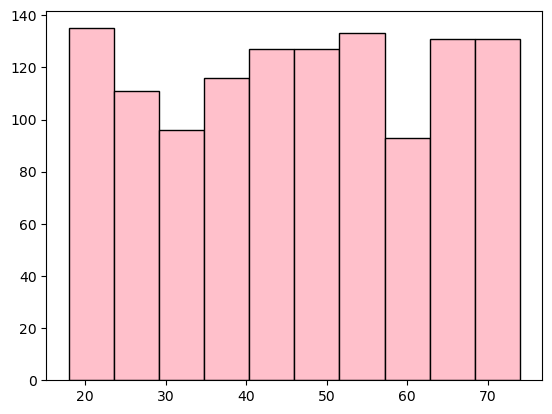

In [40]:
plt.hist(data=df,  x='Age',  bins=None,  range=None,  density=False, 
cumulative=False, color='pink', edgecolor='black') 

(array([ 12.,  59., 164., 265., 309., 228., 122.,  37.,   2.,   2.]),
 array([ 2.  ,  3.04,  4.08,  5.12,  6.16,  7.2 ,  8.24,  9.28, 10.32,
        11.36, 12.4 ]),
 <BarContainer object of 10 artists>)

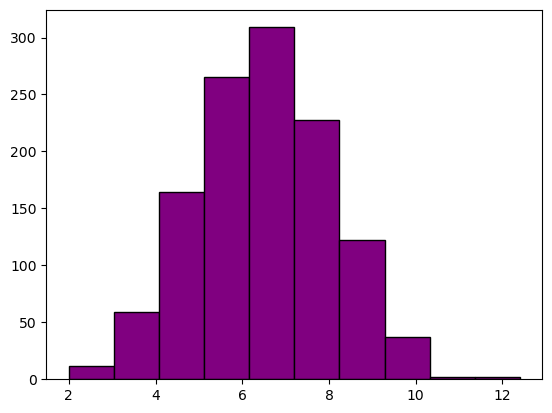

In [38]:
plt.hist(data=df,  x='Sleep_Hours',  bins=None,  range=None,  density=False, 
cumulative=False, color='purple', edgecolor='black') 

In [45]:
# Crear una nueva columna agrupando en rangos
df['Physical_Activity_Binned'] = pd.cut(df['Physical_Activity_Hrs'], bins=[0, 2, 4, 6, 8, 10, 12, 15], 
                                        labels=['0-2','2-4','4-6','6-8','8-10','10-12','12-15'])

C:\Users\noeli\AppData\Local\Temp\ipykernel_3280\2160650398.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Physical_Activity_Binned', data=df, palette='rocket')


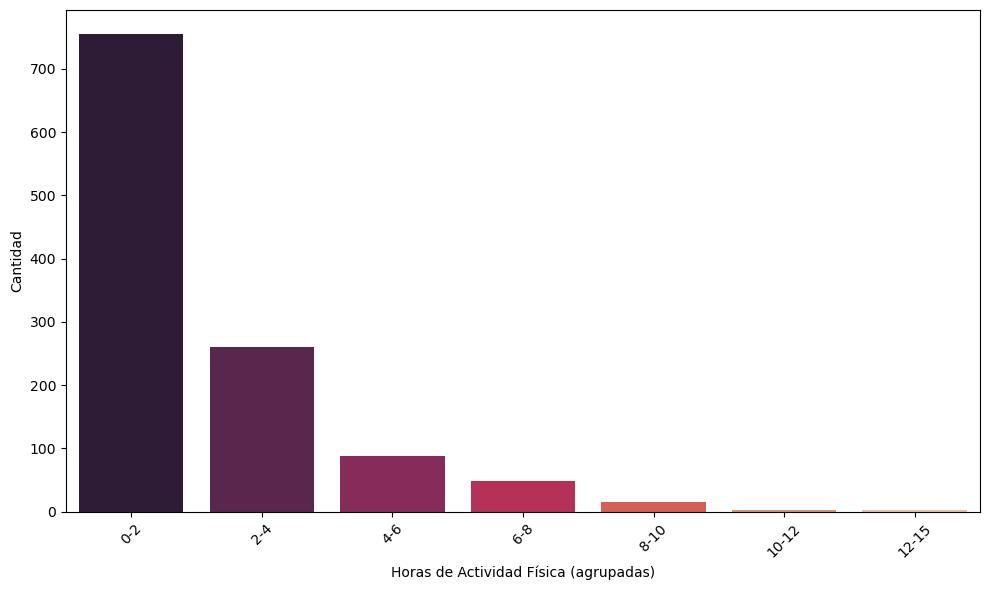

In [48]:
# Gráfico con los valores agrupados
plt.figure(figsize=(10, 6))
sns.countplot(x='Physical_Activity_Binned', data=df, palette='rocket')
plt.xlabel('Horas de Actividad Física (agrupadas)')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

(array([145., 135., 120., 129.,   0., 109., 136., 143., 134., 149.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

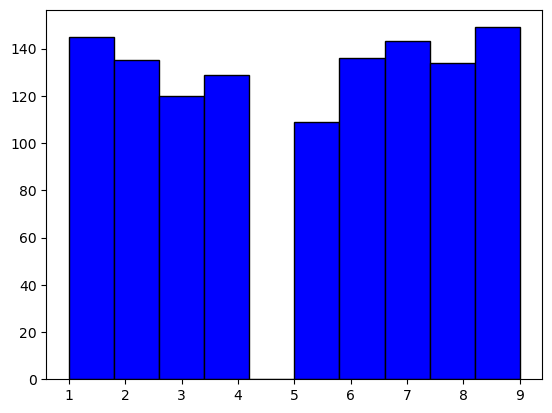

In [49]:
# Social_Support_Score	
plt.hist(data=df,  x='Social_Support_Score',  bins=None,  range=None,  density=False, 
cumulative=False, color='blue', edgecolor='black') 

C:\Users\noeli\AppData\Local\Temp\ipykernel_3280\3062323509.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Anxiety_Score', data=df, palette='coolwarm')


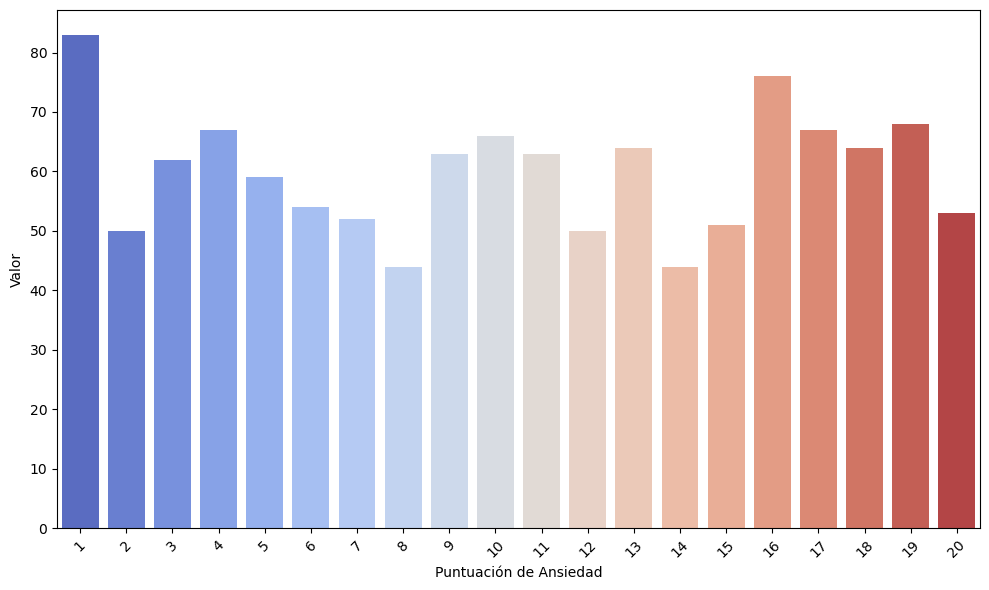

In [51]:
# Anxiety_Score
plt.figure(figsize=(10, 6))
sns.countplot(x='Anxiety_Score', data=df, palette='coolwarm')
plt.xlabel('Puntuación de Ansiedad')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

(array([108., 105., 122., 127., 118., 128., 132., 134., 105., 121.]),
 array([ 1. ,  2.9,  4.8,  6.7,  8.6, 10.5, 12.4, 14.3, 16.2, 18.1, 20. ]),
 <BarContainer object of 10 artists>)

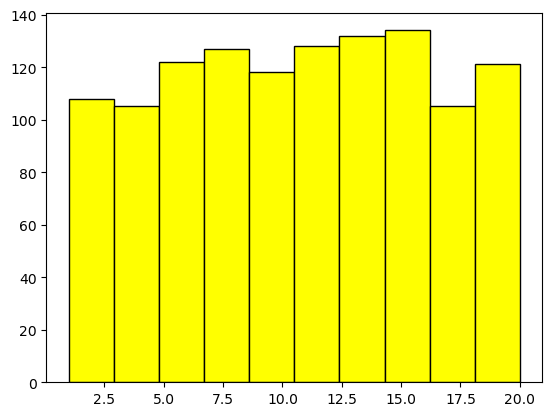

In [53]:
# Depression_Score	
plt.hist(data=df,  x='Depression_Score',  bins=None,  range=None,  density=False, 
cumulative=False, color='yellow', edgecolor='black') 

(array([125., 133., 131., 142.,   0., 140., 137., 130., 141., 121.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

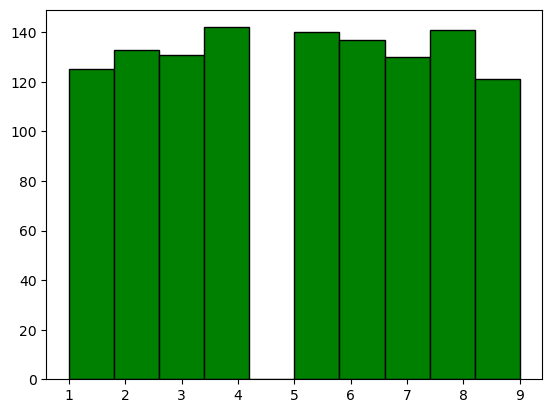

In [54]:
#Stress_Level
plt.hist(data=df,  x='Stress_Level',  bins=None,  range=None,  density=False, 
cumulative=False, color='green', edgecolor='black') 

(array([138., 129., 126., 143.,   0., 141., 135., 112., 138., 138.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

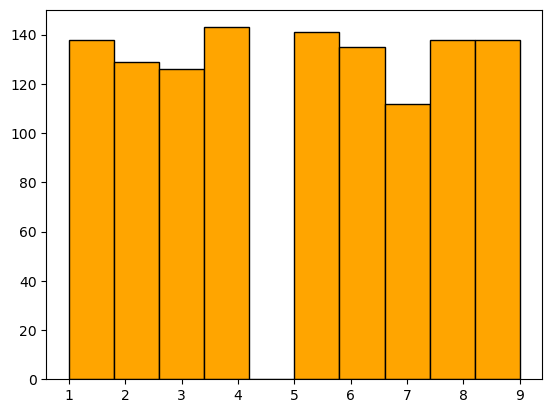

In [56]:
#Financial_Stress
plt.hist(data=df,  x='Financial_Stress',  bins=None,  range=None,  density=False, 
cumulative=False, color='orange', edgecolor='black') 

(array([138., 138., 134., 150.,   0., 132., 114., 156., 127., 111.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

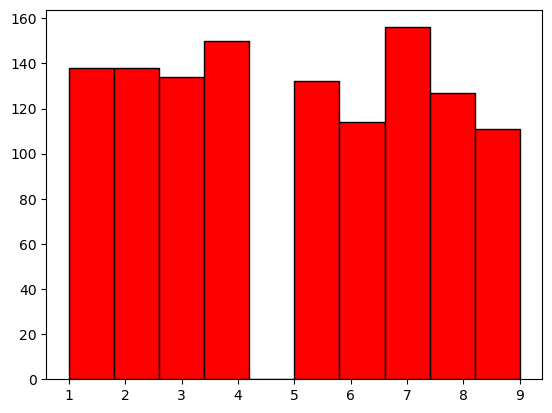

In [58]:
#Work_Stress	
plt.hist(data=df,  x='Work_Stress',  bins=None,  range=None,  density=False, 
cumulative=False, color='red', edgecolor='black') 

(array([112., 137., 137., 134.,   0., 137., 137., 141., 137., 128.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

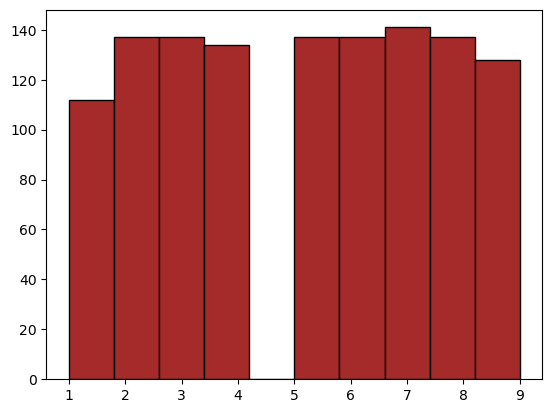

In [59]:
#Self_Esteem_Score
plt.hist(data=df,  x='Self_Esteem_Score',  bins=None,  range=None,  density=False, 
cumulative=False, color='brown', edgecolor='black') 

(array([818.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 382.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

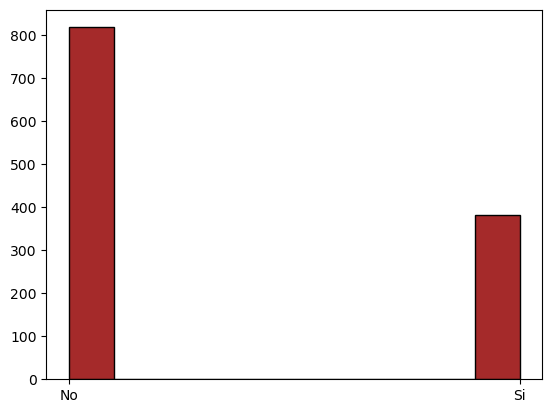

In [68]:
# Family_History_Mental_Illness
plt.hist(data=df,  x='Family_History_Mental_Illness',  bins=None,  range=None,  density=False, 
cumulative=False, color='brown', edgecolor='black') 

In [17]:
df.to_csv('csv_mental_health.csv')